In [1]:
import matplotlib.pyplot as plt

from FedAvg.fed_avg import FederatedAveraging
from SCAFFOLD.scaffold import Scaffold

--------------------
Round: 1


100%|██████████| 20/20 [00:05<00:00,  3.74it/s]


Global Model Accuracy: 52.23%
--------------------
--------------------
Round: 2


100%|██████████| 20/20 [00:03<00:00,  5.72it/s]


Global Model Accuracy: 75.98%
--------------------
--------------------
Round: 3


100%|██████████| 20/20 [00:03<00:00,  5.87it/s]


Global Model Accuracy: 85.73%
--------------------
--------------------
Round: 4


100%|██████████| 20/20 [00:03<00:00,  6.04it/s]


Global Model Accuracy: 86.75%
--------------------
--------------------
Round: 5


100%|██████████| 20/20 [00:03<00:00,  6.08it/s]


Global Model Accuracy: 89.52%
--------------------
--------------------
Round: 6


100%|██████████| 20/20 [00:03<00:00,  6.05it/s]


Global Model Accuracy: 90.19%
--------------------
--------------------
Round: 7


100%|██████████| 20/20 [00:03<00:00,  6.03it/s]


Global Model Accuracy: 90.81%
--------------------
--------------------
Round: 8


100%|██████████| 20/20 [00:03<00:00,  5.90it/s]


Global Model Accuracy: 91.21%
--------------------
--------------------
Round: 9


100%|██████████| 20/20 [00:03<00:00,  5.95it/s]


Global Model Accuracy: 91.85%
--------------------
--------------------
Round: 10


100%|██████████| 20/20 [00:03<00:00,  5.27it/s]


Global Model Accuracy: 92.31%
--------------------
--------------------
Round: 11


100%|██████████| 20/20 [00:03<00:00,  5.95it/s]


Global Model Accuracy: 92.77%
--------------------
--------------------
Round: 12


100%|██████████| 20/20 [00:03<00:00,  5.48it/s]


Global Model Accuracy: 93.08%
--------------------
--------------------
Round: 13


100%|██████████| 20/20 [00:03<00:00,  5.35it/s]


Global Model Accuracy: 93.64%
--------------------
--------------------
Round: 14


100%|██████████| 20/20 [00:03<00:00,  5.31it/s]


Global Model Accuracy: 93.70%
--------------------
--------------------
Round: 15


100%|██████████| 20/20 [00:03<00:00,  5.47it/s]


Global Model Accuracy: 93.90%
--------------------


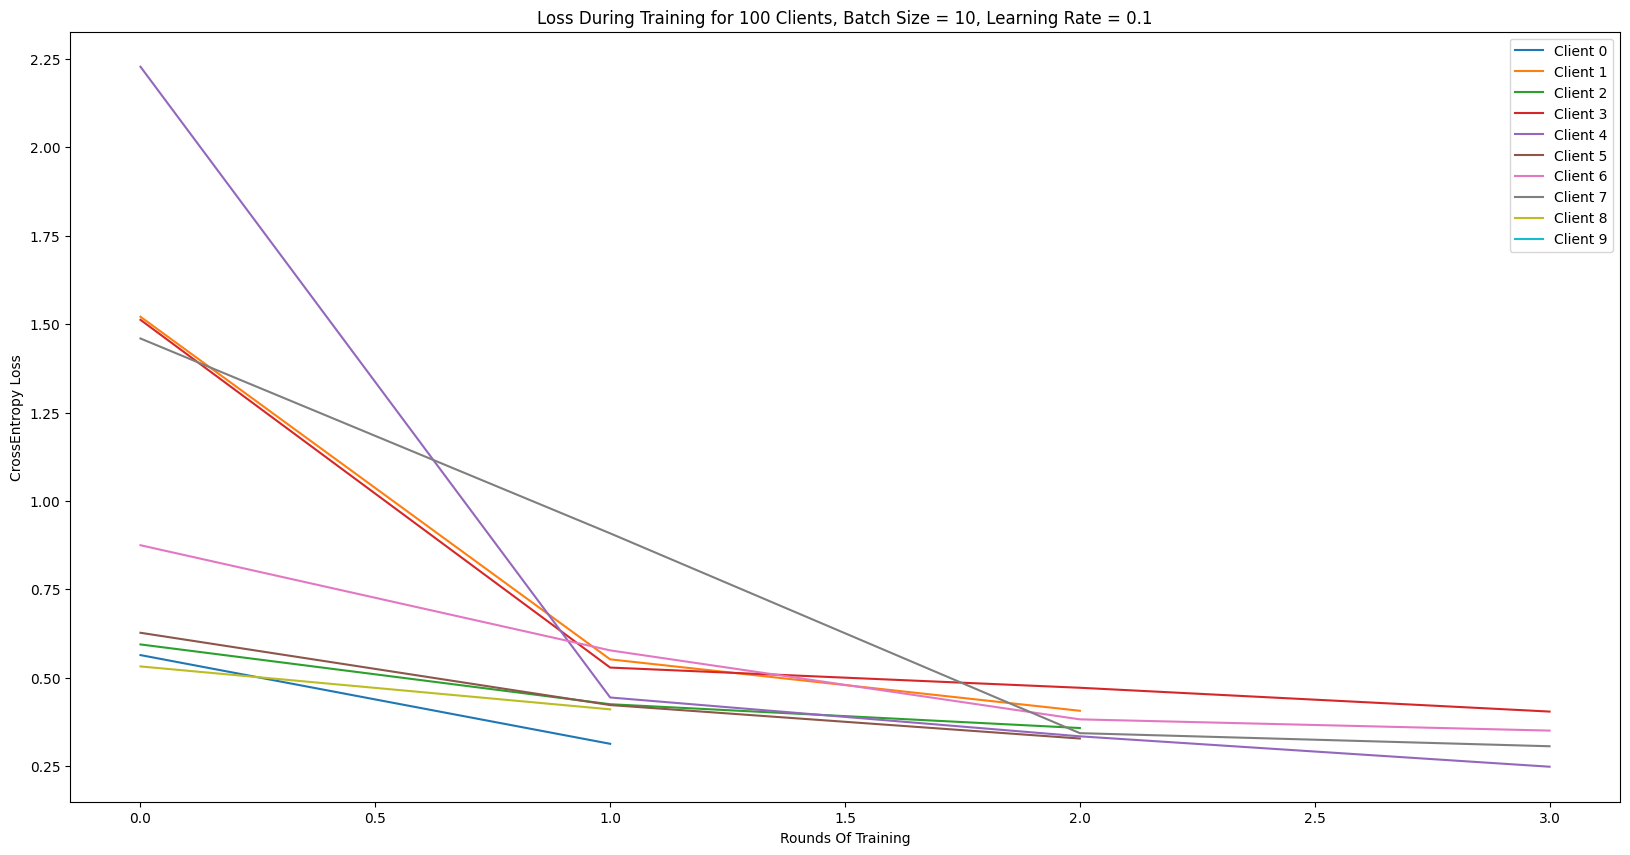

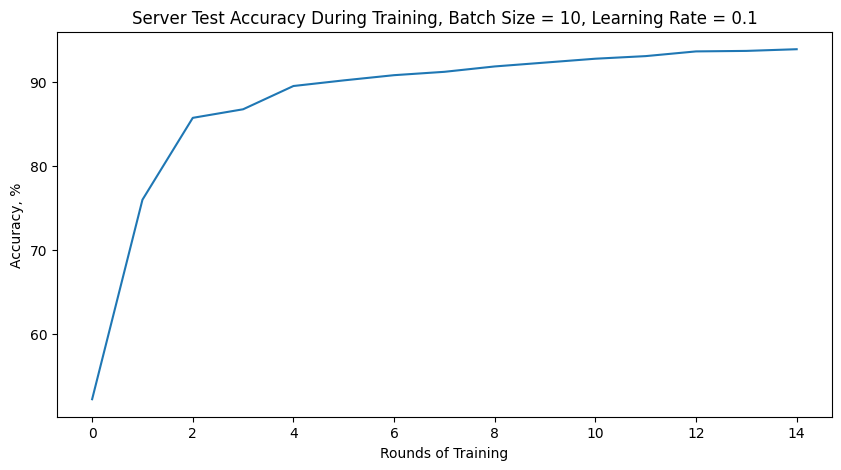

--------------------
Round: 1


100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


Global Model Accuracy: 43.68%
--------------------
--------------------
Round: 2


100%|██████████| 20/20 [00:03<00:00,  5.19it/s]


Global Model Accuracy: 55.15%
--------------------
--------------------
Round: 3


100%|██████████| 20/20 [00:03<00:00,  5.37it/s]


Global Model Accuracy: 70.48%
--------------------
--------------------
Round: 4


100%|██████████| 20/20 [00:03<00:00,  5.43it/s]


Global Model Accuracy: 80.04%
--------------------
--------------------
Round: 5


100%|██████████| 20/20 [00:03<00:00,  5.49it/s]


Global Model Accuracy: 83.12%
--------------------
--------------------
Round: 6


100%|██████████| 20/20 [00:03<00:00,  5.84it/s]


Global Model Accuracy: 84.90%
--------------------
--------------------
Round: 7


100%|██████████| 20/20 [00:03<00:00,  5.40it/s]


Global Model Accuracy: 86.88%
--------------------
--------------------
Round: 8


100%|██████████| 20/20 [00:03<00:00,  5.68it/s]


Global Model Accuracy: 87.86%
--------------------
--------------------
Round: 9


100%|██████████| 20/20 [00:03<00:00,  5.30it/s]


Global Model Accuracy: 88.65%
--------------------
--------------------
Round: 10


100%|██████████| 20/20 [00:03<00:00,  5.52it/s]


Global Model Accuracy: 89.39%
--------------------
--------------------
Round: 11


100%|██████████| 20/20 [00:04<00:00,  4.85it/s]


Global Model Accuracy: 89.95%
--------------------
--------------------
Round: 12


100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


Global Model Accuracy: 90.44%
--------------------
--------------------
Round: 13


100%|██████████| 20/20 [00:03<00:00,  5.55it/s]


Global Model Accuracy: 90.73%
--------------------
--------------------
Round: 14


100%|██████████| 20/20 [00:03<00:00,  5.95it/s]


Global Model Accuracy: 91.08%
--------------------
--------------------
Round: 15


100%|██████████| 20/20 [00:03<00:00,  5.29it/s]


Global Model Accuracy: 91.51%
--------------------


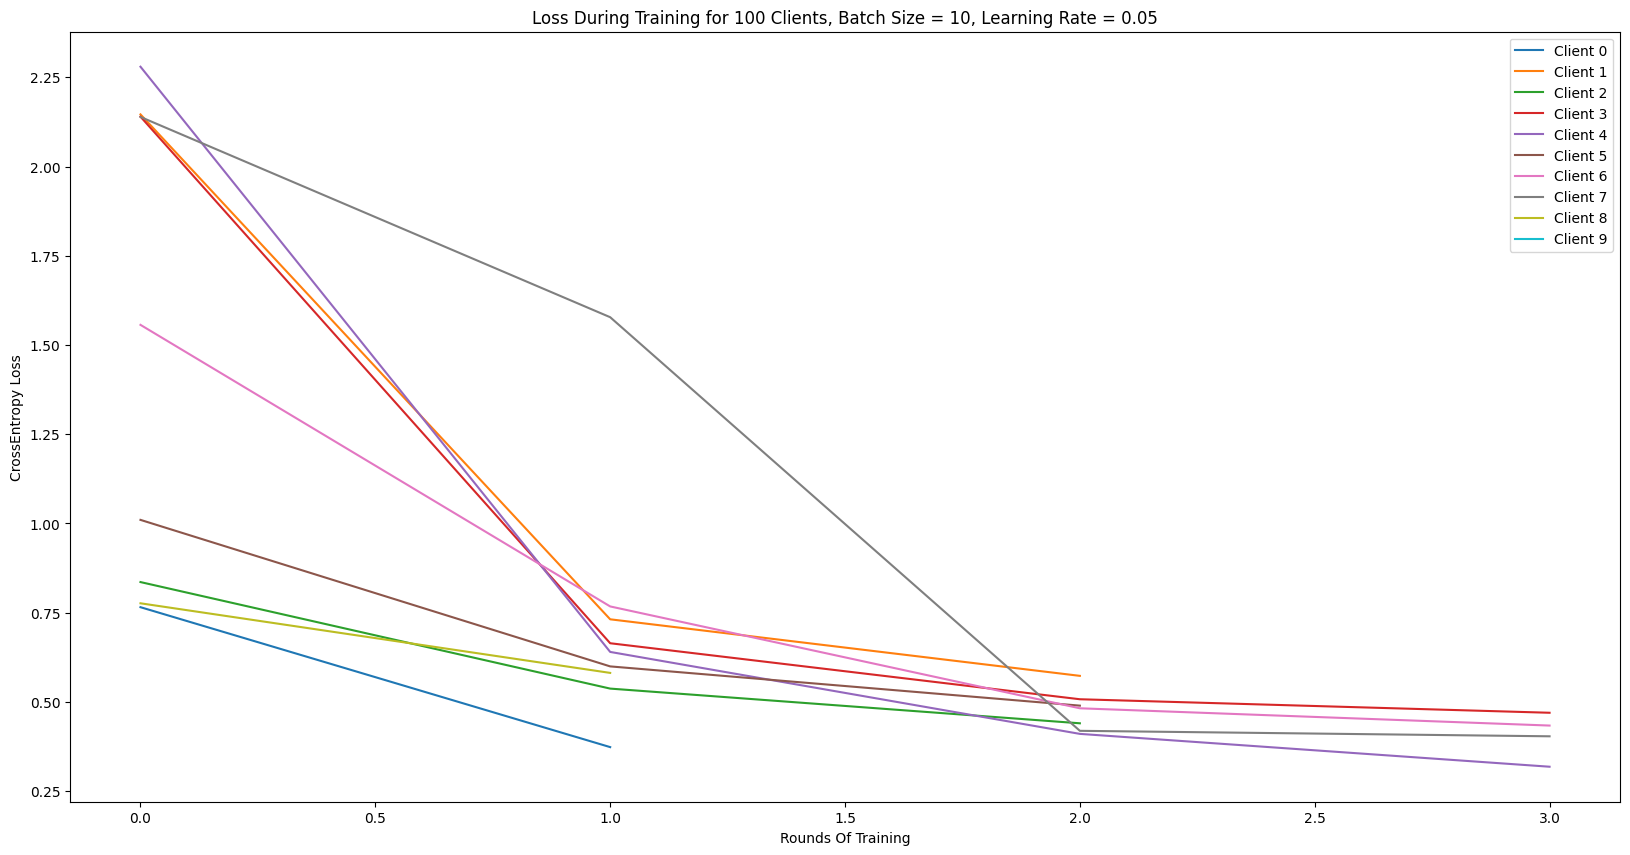

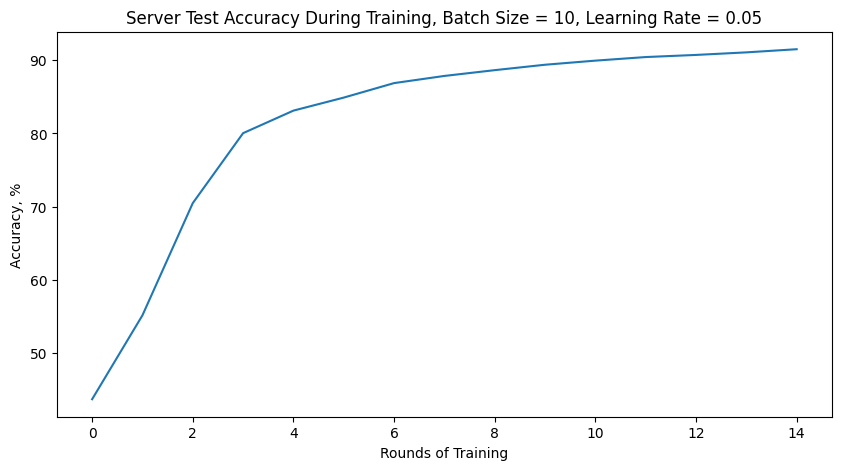

--------------------
Round: 1


100%|██████████| 20/20 [00:01<00:00, 10.76it/s]


Global Model Accuracy: 23.16%
--------------------
--------------------
Round: 2


100%|██████████| 20/20 [00:02<00:00,  9.23it/s]


Global Model Accuracy: 35.53%
--------------------
--------------------
Round: 3


100%|██████████| 20/20 [00:01<00:00, 10.52it/s]


Global Model Accuracy: 50.83%
--------------------
--------------------
Round: 4


100%|██████████| 20/20 [00:01<00:00, 10.71it/s]


Global Model Accuracy: 59.30%
--------------------
--------------------
Round: 5


100%|██████████| 20/20 [00:02<00:00,  9.91it/s]


Global Model Accuracy: 62.97%
--------------------
--------------------
Round: 6


100%|██████████| 20/20 [00:01<00:00, 11.61it/s]


Global Model Accuracy: 64.19%
--------------------
--------------------
Round: 7


100%|██████████| 20/20 [00:01<00:00, 10.45it/s]


Global Model Accuracy: 68.74%
--------------------
--------------------
Round: 8


100%|██████████| 20/20 [00:01<00:00, 11.19it/s]


Global Model Accuracy: 74.05%
--------------------
--------------------
Round: 9


100%|██████████| 20/20 [00:02<00:00,  9.63it/s]


Global Model Accuracy: 75.91%
--------------------
--------------------
Round: 10


100%|██████████| 20/20 [00:02<00:00,  9.84it/s]


Global Model Accuracy: 79.28%
--------------------
--------------------
Round: 11


100%|██████████| 20/20 [00:01<00:00, 10.41it/s]


Global Model Accuracy: 81.06%
--------------------
--------------------
Round: 12


100%|██████████| 20/20 [00:01<00:00, 10.68it/s]


Global Model Accuracy: 82.25%
--------------------
--------------------
Round: 13


100%|██████████| 20/20 [00:01<00:00, 10.44it/s]


Global Model Accuracy: 84.08%
--------------------
--------------------
Round: 14


100%|██████████| 20/20 [00:01<00:00, 10.22it/s]


Global Model Accuracy: 85.65%
--------------------
--------------------
Round: 15


100%|██████████| 20/20 [00:02<00:00,  9.98it/s]


Global Model Accuracy: 86.15%
--------------------


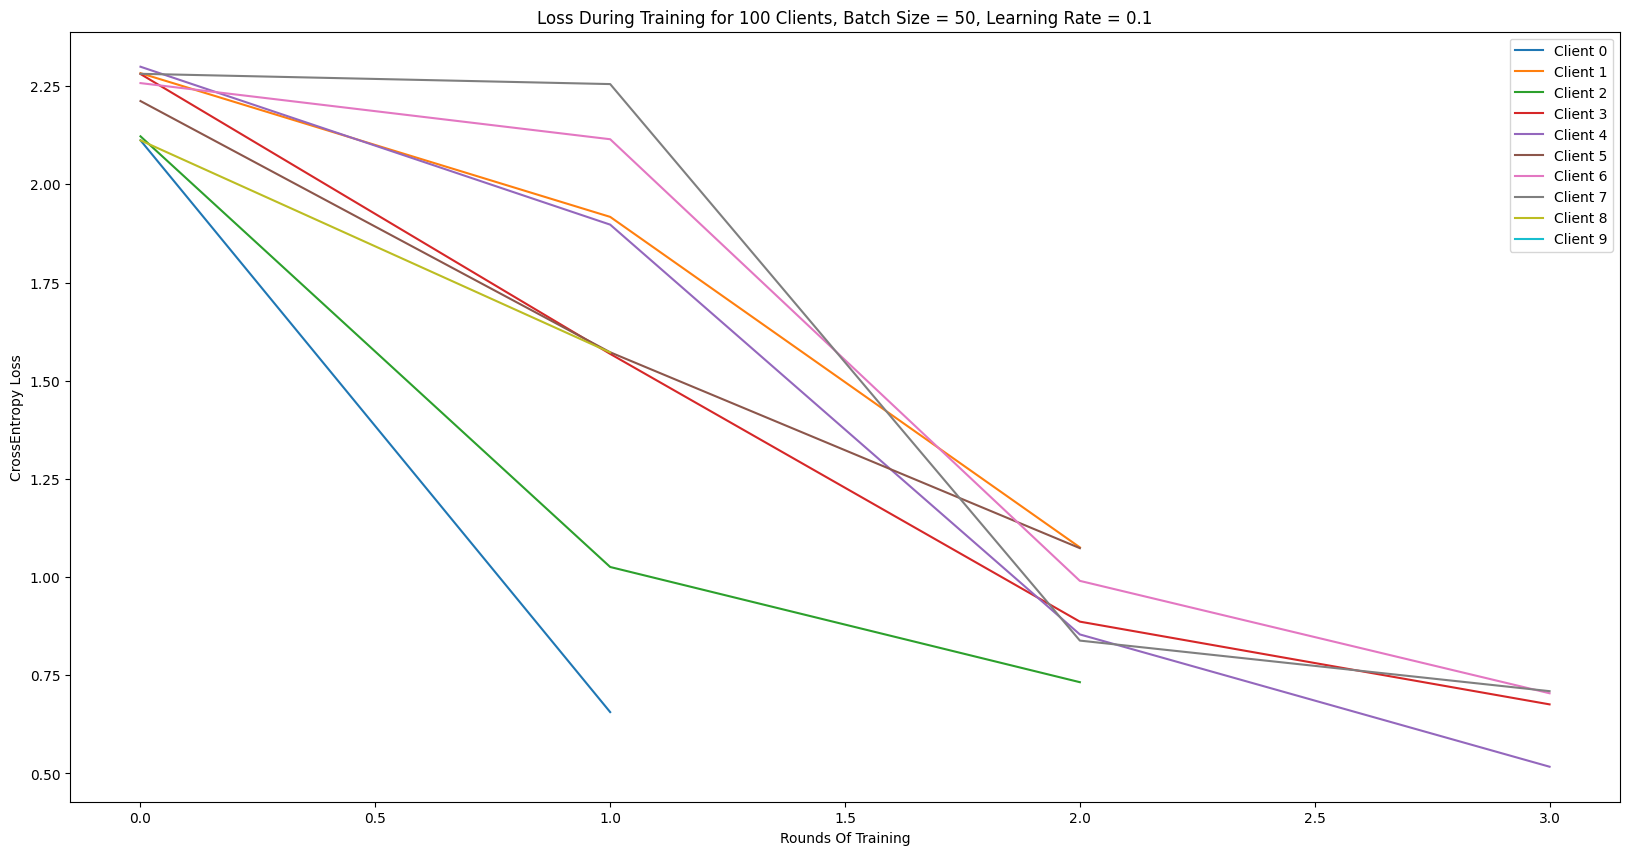

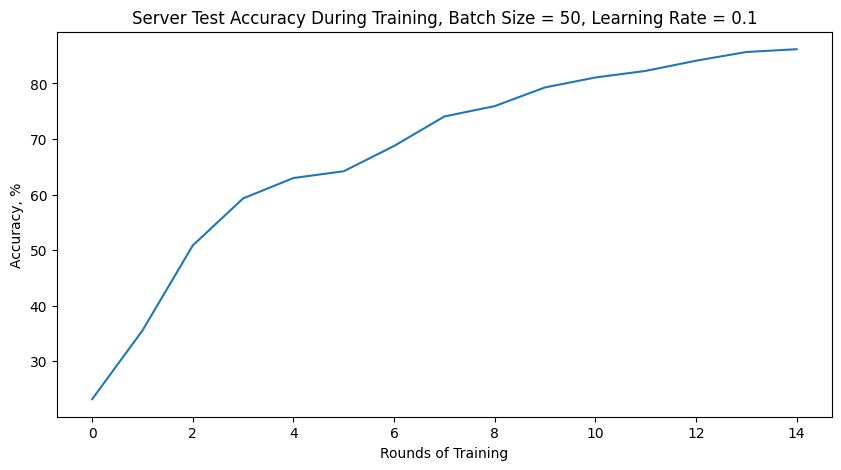

--------------------
Round: 1


100%|██████████| 20/20 [00:02<00:00,  9.71it/s]


Global Model Accuracy: 15.25%
--------------------
--------------------
Round: 2


100%|██████████| 20/20 [00:01<00:00, 10.68it/s]


Global Model Accuracy: 21.66%
--------------------
--------------------
Round: 3


100%|██████████| 20/20 [00:01<00:00, 10.89it/s]


Global Model Accuracy: 23.62%
--------------------
--------------------
Round: 4


100%|██████████| 20/20 [00:02<00:00,  9.36it/s]


Global Model Accuracy: 27.90%
--------------------
--------------------
Round: 5


100%|██████████| 20/20 [00:02<00:00,  6.88it/s]


Global Model Accuracy: 33.53%
--------------------
--------------------
Round: 6


100%|██████████| 20/20 [00:01<00:00, 11.00it/s]


Global Model Accuracy: 41.30%
--------------------
--------------------
Round: 7


100%|██████████| 20/20 [00:01<00:00, 10.01it/s]


Global Model Accuracy: 46.33%
--------------------
--------------------
Round: 8


100%|██████████| 20/20 [00:01<00:00, 11.34it/s]


Global Model Accuracy: 48.87%
--------------------
--------------------
Round: 9


100%|██████████| 20/20 [00:01<00:00, 11.24it/s]


Global Model Accuracy: 50.77%
--------------------
--------------------
Round: 10


100%|██████████| 20/20 [00:01<00:00, 10.13it/s]


Global Model Accuracy: 52.97%
--------------------
--------------------
Round: 11


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


Global Model Accuracy: 58.33%
--------------------
--------------------
Round: 12


100%|██████████| 20/20 [00:01<00:00, 11.05it/s]


Global Model Accuracy: 61.63%
--------------------
--------------------
Round: 13


100%|██████████| 20/20 [00:01<00:00, 11.43it/s]


Global Model Accuracy: 66.82%
--------------------
--------------------
Round: 14


100%|██████████| 20/20 [00:01<00:00, 10.31it/s]


Global Model Accuracy: 71.50%
--------------------
--------------------
Round: 15


100%|██████████| 20/20 [00:01<00:00, 11.34it/s]


Global Model Accuracy: 73.82%
--------------------


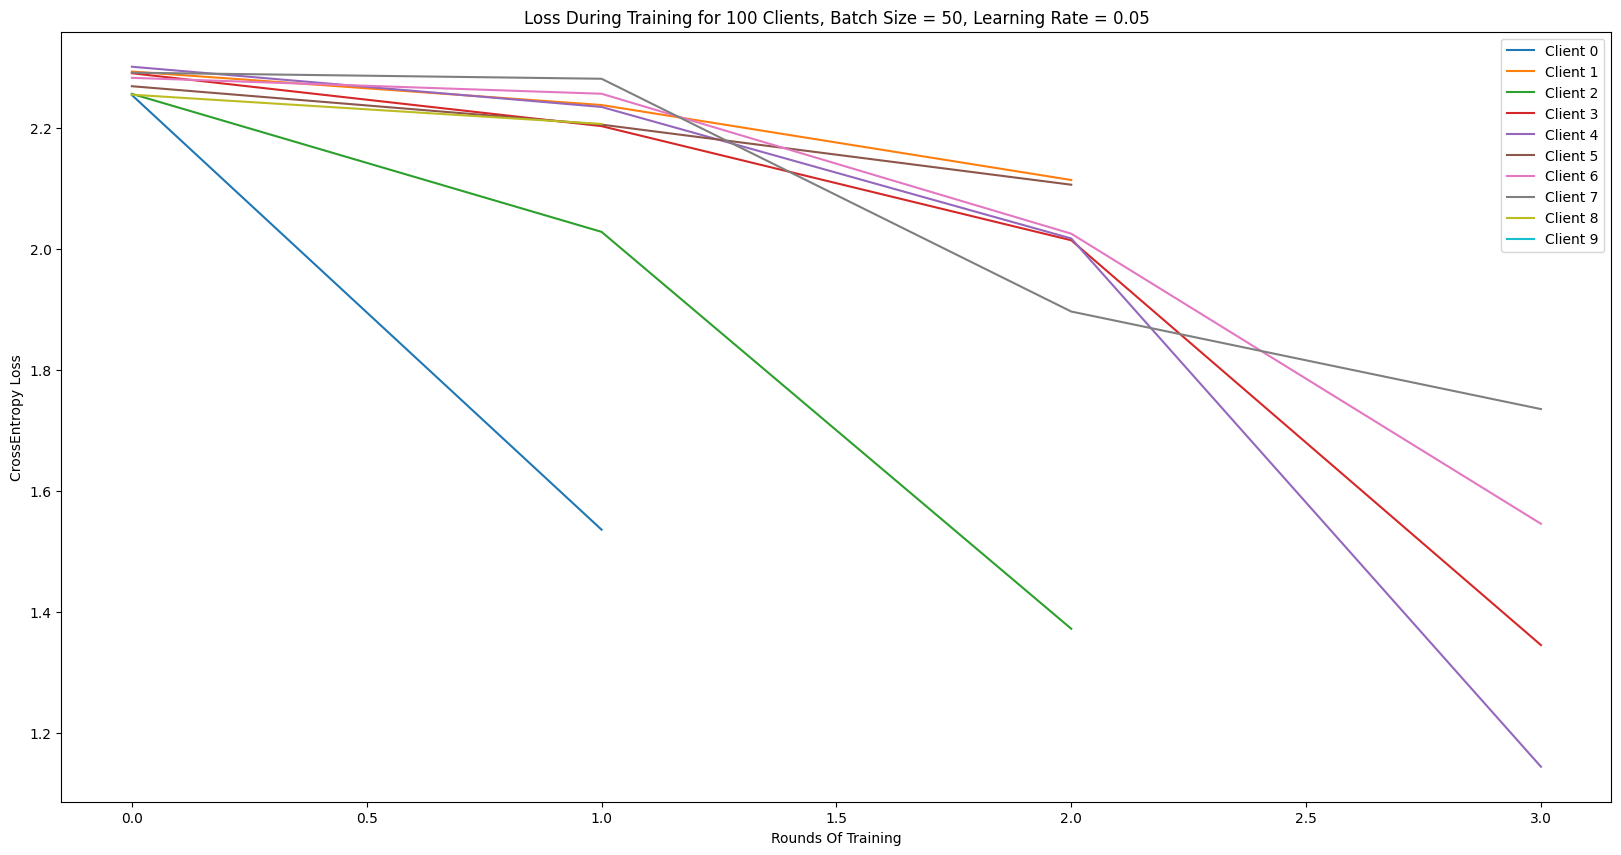

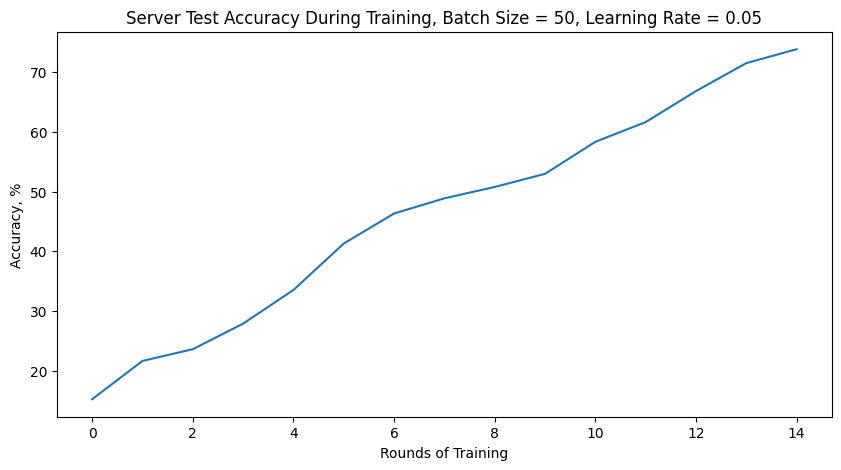

In [2]:
batches = [10, 50]
lrs = [0.1, 0.05]
for batch_size in batches:
    for lr in lrs:
        fa = FederatedAveraging(batch_size=batch_size, lr=lr, model_params={
            'input_dim': 784,
            'hidden_dim': 200,
            'output_dim': 10,
            'hidden_layers_num': 2
        }, device="cpu")
        fa.prepare()

        fa.train(verbose=False)

        fa_logs = [client.logs for client in fa.server.clients]

        plt.figure(figsize=(20, 10))
        plt.title(f"Loss During Training for {fa.clients_num} Clients, Batch Size = {batch_size}, Learning Rate = {lr}")
        plt.xlabel("Rounds Of Training")
        plt.ylabel("CrossEntropy Loss")
        for i in range(10):
            plt.plot(range(fa_logs[i]['rounds_num']), fa_logs[i]['losses'], label=f"Client {i}")

        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.xlabel("Rounds of Training")
        plt.ylabel("Accuracy, %")
        plt.title("Server Test Accuracy During Training, Batch Size = {}, Learning Rate = {}".format(batch_size, lr))
        plt.plot(fa.server.logs['val_accuracy'])

        plt.show()

--------------------
Round: 1


100%|██████████| 20/20 [00:03<00:00,  5.72it/s]


Updating global control variate...
Global Model Accuracy: 22.38%
--------------------
--------------------
Round: 2


100%|██████████| 20/20 [00:03<00:00,  6.41it/s]


Updating global control variate...
Global Model Accuracy: 32.05%
--------------------
--------------------
Round: 3


100%|██████████| 20/20 [00:03<00:00,  6.48it/s]


Updating global control variate...
Global Model Accuracy: 45.51%
--------------------
--------------------
Round: 4


100%|██████████| 20/20 [00:02<00:00,  6.81it/s]


Updating global control variate...
Global Model Accuracy: 54.69%
--------------------
--------------------
Round: 5


100%|██████████| 20/20 [00:03<00:00,  5.96it/s]


Updating global control variate...
Global Model Accuracy: 60.60%
--------------------
--------------------
Round: 6


100%|██████████| 20/20 [00:03<00:00,  6.45it/s]


Updating global control variate...
Global Model Accuracy: 64.74%
--------------------
--------------------
Round: 7


100%|██████████| 20/20 [00:03<00:00,  6.05it/s]


Updating global control variate...
Global Model Accuracy: 67.48%
--------------------
--------------------
Round: 8


100%|██████████| 20/20 [00:03<00:00,  6.54it/s]


Updating global control variate...
Global Model Accuracy: 70.02%
--------------------
--------------------
Round: 9


100%|██████████| 20/20 [00:03<00:00,  5.71it/s]


Updating global control variate...
Global Model Accuracy: 71.22%
--------------------
--------------------
Round: 10


100%|██████████| 20/20 [00:03<00:00,  6.43it/s]


Updating global control variate...
Global Model Accuracy: 72.20%
--------------------
--------------------
Round: 11


100%|██████████| 20/20 [00:05<00:00,  3.81it/s]


Updating global control variate...
Global Model Accuracy: 74.43%
--------------------
--------------------
Round: 12


100%|██████████| 20/20 [00:03<00:00,  5.21it/s]


Updating global control variate...
Global Model Accuracy: 76.28%
--------------------
--------------------
Round: 13


100%|██████████| 20/20 [00:03<00:00,  5.37it/s]


Updating global control variate...
Global Model Accuracy: 78.78%
--------------------
--------------------
Round: 14


100%|██████████| 20/20 [00:02<00:00,  6.81it/s]


Updating global control variate...
Global Model Accuracy: 80.38%
--------------------
--------------------
Round: 15


100%|██████████| 20/20 [00:02<00:00,  7.23it/s]


Updating global control variate...
Global Model Accuracy: 81.53%
--------------------


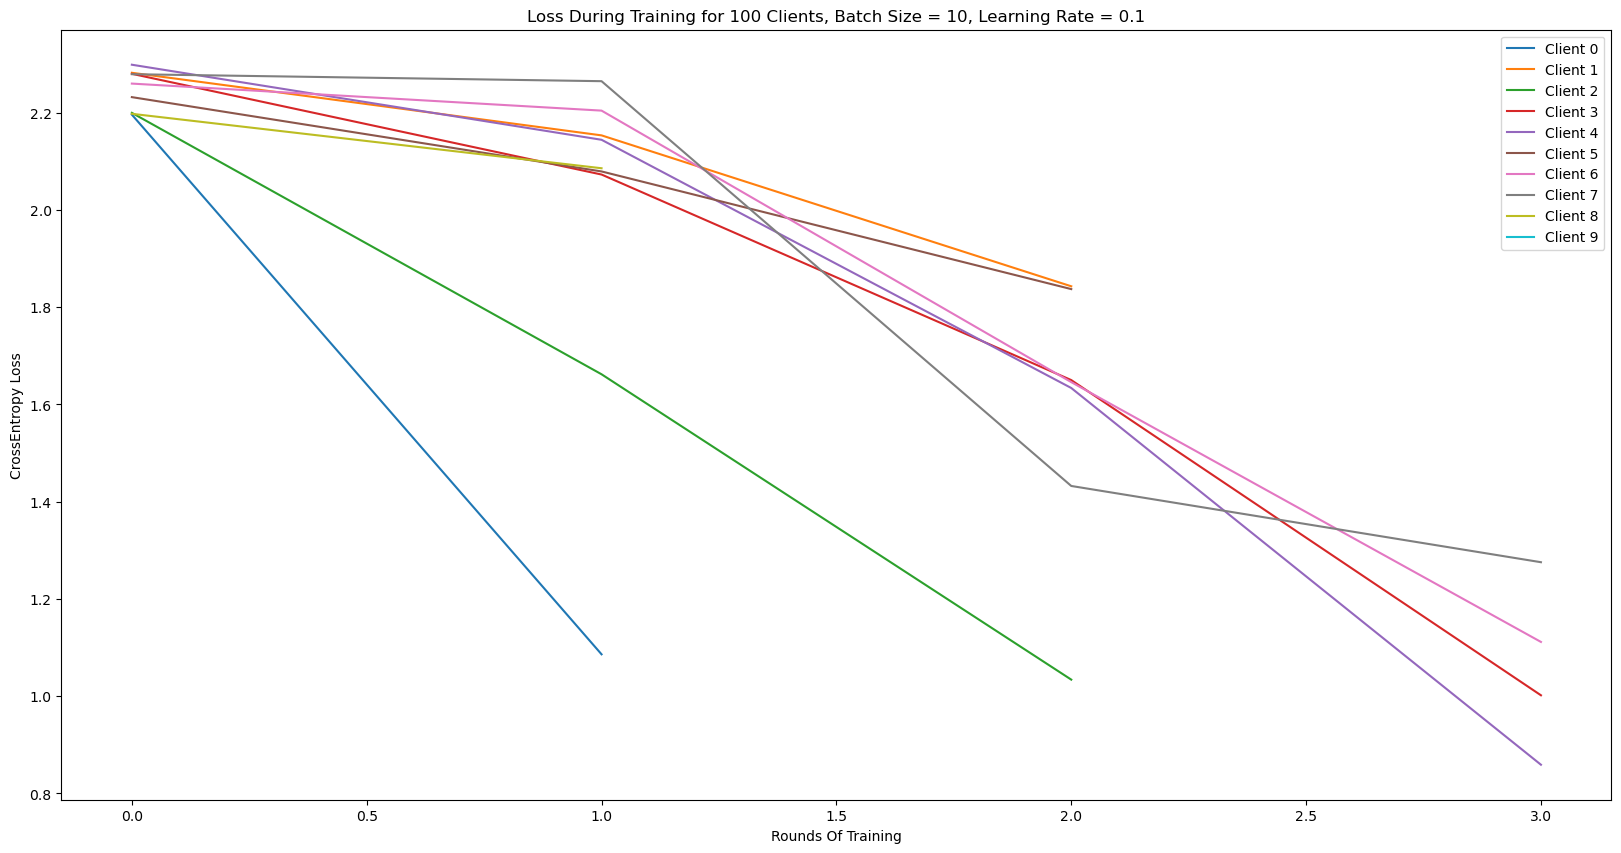

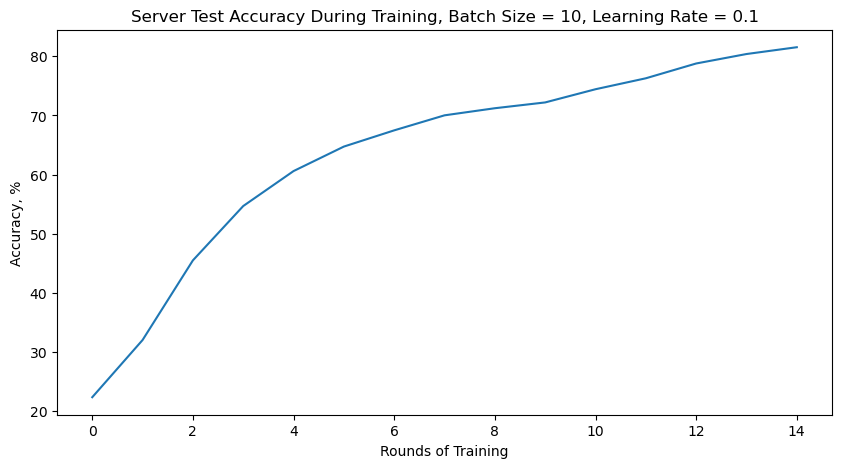

--------------------
Round: 1


100%|██████████| 20/20 [00:03<00:00,  6.17it/s]


Updating global control variate...
Global Model Accuracy: 16.15%
--------------------
--------------------
Round: 2


100%|██████████| 20/20 [00:03<00:00,  6.48it/s]


Updating global control variate...
Global Model Accuracy: 33.08%
--------------------
--------------------
Round: 3


100%|██████████| 20/20 [00:02<00:00,  6.77it/s]


Updating global control variate...
Global Model Accuracy: 41.33%
--------------------
--------------------
Round: 4


100%|██████████| 20/20 [00:04<00:00,  4.65it/s]


Updating global control variate...
Global Model Accuracy: 49.37%
--------------------
--------------------
Round: 5


100%|██████████| 20/20 [00:03<00:00,  6.48it/s]


Updating global control variate...
Global Model Accuracy: 59.18%
--------------------
--------------------
Round: 6


100%|██████████| 20/20 [00:02<00:00,  7.15it/s]


Updating global control variate...
Global Model Accuracy: 65.57%
--------------------
--------------------
Round: 7


100%|██████████| 20/20 [00:03<00:00,  5.69it/s]


Updating global control variate...
Global Model Accuracy: 68.09%
--------------------
--------------------
Round: 8


100%|██████████| 20/20 [00:02<00:00,  7.02it/s]


Updating global control variate...
Global Model Accuracy: 67.78%
--------------------
--------------------
Round: 9


100%|██████████| 20/20 [00:02<00:00,  6.97it/s]


Updating global control variate...
Global Model Accuracy: 69.26%
--------------------
--------------------
Round: 10


100%|██████████| 20/20 [00:02<00:00,  7.18it/s]


Updating global control variate...
Global Model Accuracy: 71.55%
--------------------
--------------------
Round: 11


100%|██████████| 20/20 [00:02<00:00,  6.90it/s]


Updating global control variate...
Global Model Accuracy: 74.74%
--------------------
--------------------
Round: 12


100%|██████████| 20/20 [00:03<00:00,  6.61it/s]


Updating global control variate...
Global Model Accuracy: 77.37%
--------------------
--------------------
Round: 13


100%|██████████| 20/20 [00:03<00:00,  6.20it/s]


Updating global control variate...
Global Model Accuracy: 79.09%
--------------------
--------------------
Round: 14


100%|██████████| 20/20 [00:02<00:00,  7.11it/s]


Updating global control variate...
Global Model Accuracy: 80.80%
--------------------
--------------------
Round: 15


100%|██████████| 20/20 [00:02<00:00,  6.85it/s]


Updating global control variate...
Global Model Accuracy: 81.75%
--------------------


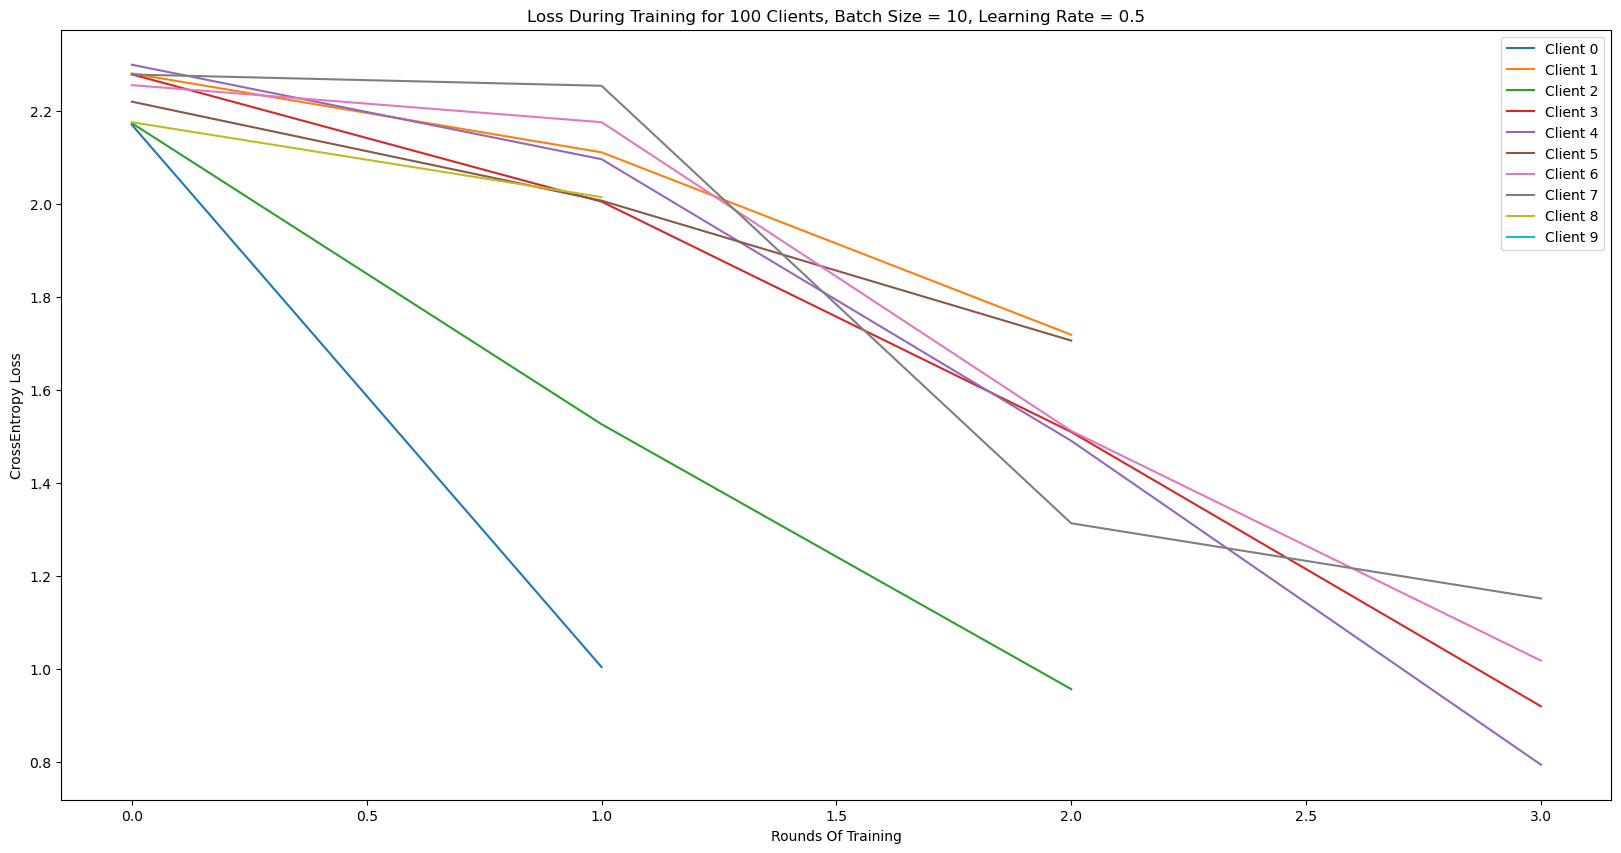

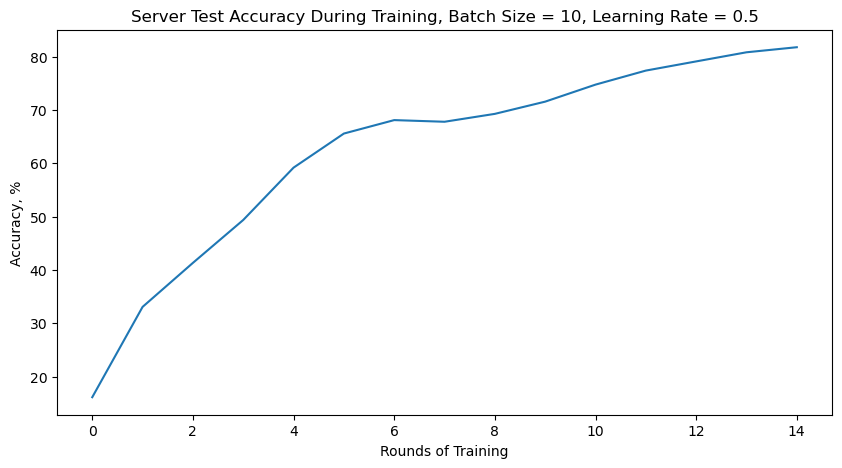

--------------------
Round: 1


100%|██████████| 20/20 [00:01<00:00, 14.96it/s]


Updating global control variate...
Global Model Accuracy: 14.78%
--------------------
--------------------
Round: 2


100%|██████████| 20/20 [00:01<00:00, 19.18it/s]


Updating global control variate...
Global Model Accuracy: 15.73%
--------------------
--------------------
Round: 3


100%|██████████| 20/20 [00:01<00:00, 18.45it/s]


Updating global control variate...
Global Model Accuracy: 16.91%
--------------------
--------------------
Round: 4


100%|██████████| 20/20 [00:01<00:00, 16.12it/s]


Updating global control variate...
Global Model Accuracy: 18.27%
--------------------
--------------------
Round: 5


100%|██████████| 20/20 [00:00<00:00, 20.05it/s]


Updating global control variate...
Global Model Accuracy: 19.54%
--------------------
--------------------
Round: 6


100%|██████████| 20/20 [00:01<00:00, 17.30it/s]


Updating global control variate...
Global Model Accuracy: 21.33%
--------------------
--------------------
Round: 7


100%|██████████| 20/20 [00:01<00:00, 14.48it/s]


Updating global control variate...
Global Model Accuracy: 24.14%
--------------------
--------------------
Round: 8


100%|██████████| 20/20 [00:01<00:00, 19.12it/s]


Updating global control variate...
Global Model Accuracy: 27.89%
--------------------
--------------------
Round: 9


100%|██████████| 20/20 [00:01<00:00, 18.77it/s]


Updating global control variate...
Global Model Accuracy: 31.82%
--------------------
--------------------
Round: 10


100%|██████████| 20/20 [00:01<00:00, 19.50it/s]


Updating global control variate...
Global Model Accuracy: 35.92%
--------------------
--------------------
Round: 11


100%|██████████| 20/20 [00:00<00:00, 20.07it/s]


Updating global control variate...
Global Model Accuracy: 39.57%
--------------------
--------------------
Round: 12


100%|██████████| 20/20 [00:01<00:00, 18.62it/s]


Updating global control variate...
Global Model Accuracy: 42.99%
--------------------
--------------------
Round: 13


100%|██████████| 20/20 [00:01<00:00, 17.70it/s]


Updating global control variate...
Global Model Accuracy: 45.80%
--------------------
--------------------
Round: 14


100%|██████████| 20/20 [00:01<00:00, 18.43it/s]


Updating global control variate...
Global Model Accuracy: 48.29%
--------------------
--------------------
Round: 15


100%|██████████| 20/20 [00:01<00:00, 18.80it/s]


Updating global control variate...
Global Model Accuracy: 50.12%
--------------------


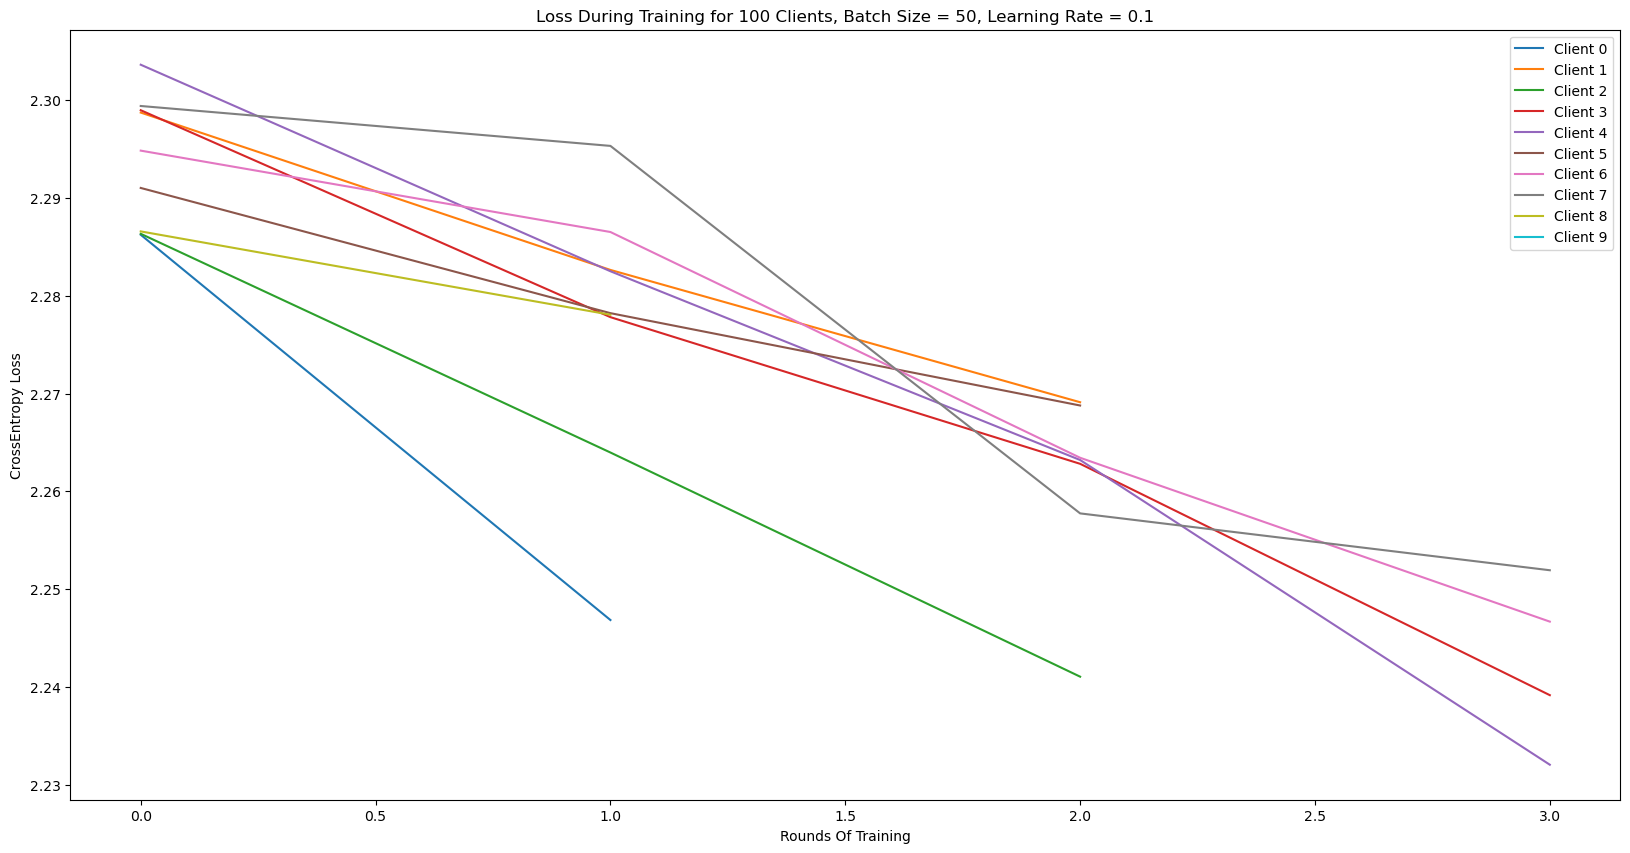

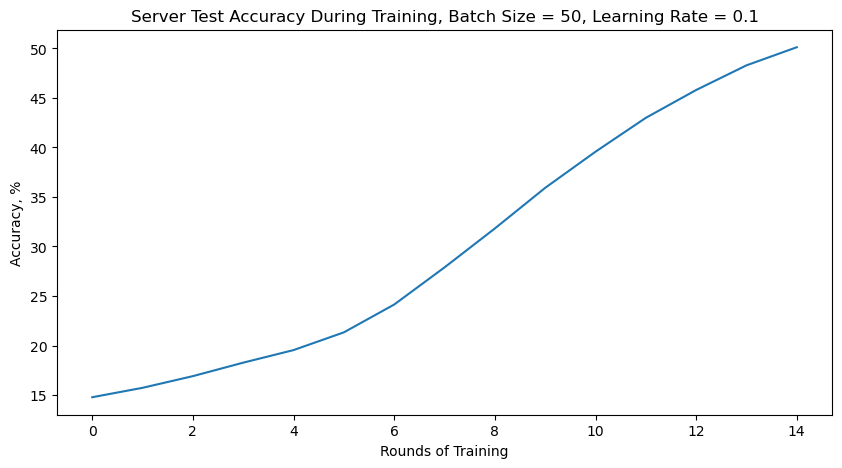

--------------------
Round: 1


100%|██████████| 20/20 [00:01<00:00, 15.55it/s]


Updating global control variate...
Global Model Accuracy: 5.76%
--------------------
--------------------
Round: 2


100%|██████████| 20/20 [00:01<00:00, 16.73it/s]


Updating global control variate...
Global Model Accuracy: 6.93%
--------------------
--------------------
Round: 3


100%|██████████| 20/20 [00:01<00:00, 17.49it/s]


Updating global control variate...
Global Model Accuracy: 8.14%
--------------------
--------------------
Round: 4


100%|██████████| 20/20 [00:01<00:00, 17.50it/s]


Updating global control variate...
Global Model Accuracy: 10.10%
--------------------
--------------------
Round: 5


100%|██████████| 20/20 [00:01<00:00, 16.55it/s]


Updating global control variate...
Global Model Accuracy: 12.92%
--------------------
--------------------
Round: 6


100%|██████████| 20/20 [00:01<00:00, 14.66it/s]


Updating global control variate...
Global Model Accuracy: 16.14%
--------------------
--------------------
Round: 7


100%|██████████| 20/20 [00:01<00:00, 18.26it/s]


Updating global control variate...
Global Model Accuracy: 19.14%
--------------------
--------------------
Round: 8


100%|██████████| 20/20 [00:01<00:00, 18.27it/s]


Updating global control variate...
Global Model Accuracy: 22.36%
--------------------
--------------------
Round: 9


100%|██████████| 20/20 [00:01<00:00, 15.06it/s]


Updating global control variate...
Global Model Accuracy: 25.00%
--------------------
--------------------
Round: 10


100%|██████████| 20/20 [00:01<00:00, 16.90it/s]


Updating global control variate...
Global Model Accuracy: 27.41%
--------------------
--------------------
Round: 11


100%|██████████| 20/20 [00:01<00:00, 14.86it/s]


Updating global control variate...
Global Model Accuracy: 29.10%
--------------------
--------------------
Round: 12


100%|██████████| 20/20 [00:01<00:00, 13.73it/s]


Updating global control variate...
Global Model Accuracy: 30.55%
--------------------
--------------------
Round: 13


100%|██████████| 20/20 [00:01<00:00, 13.66it/s]


Updating global control variate...
Global Model Accuracy: 32.27%
--------------------
--------------------
Round: 14


100%|██████████| 20/20 [00:01<00:00, 18.30it/s]


Updating global control variate...
Global Model Accuracy: 34.10%
--------------------
--------------------
Round: 15


100%|██████████| 20/20 [00:01<00:00, 14.06it/s]


Updating global control variate...
Global Model Accuracy: 35.49%
--------------------


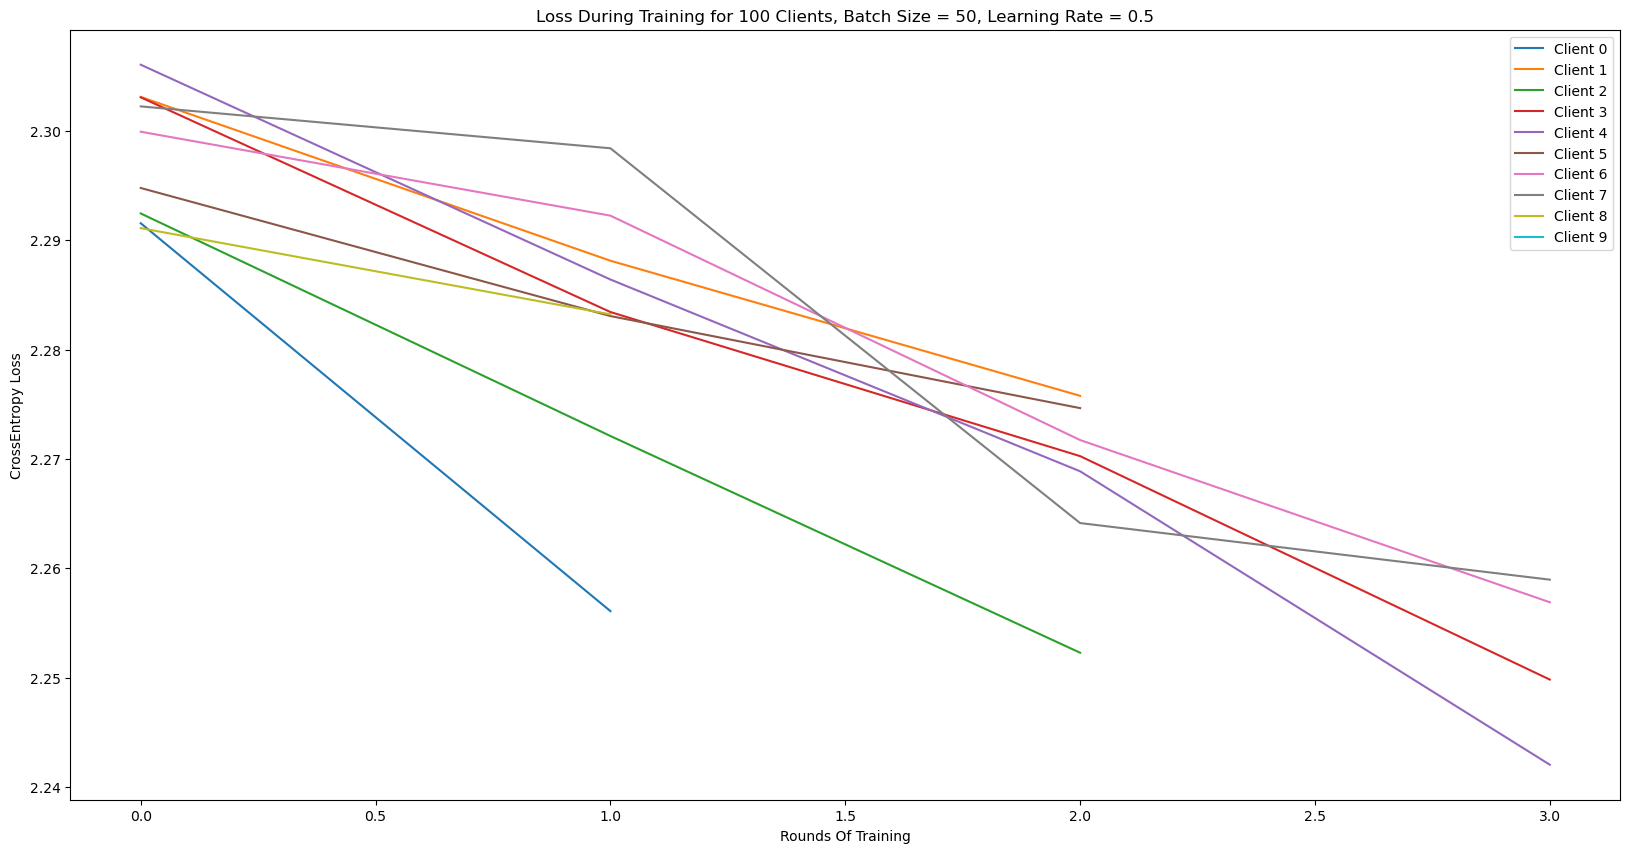

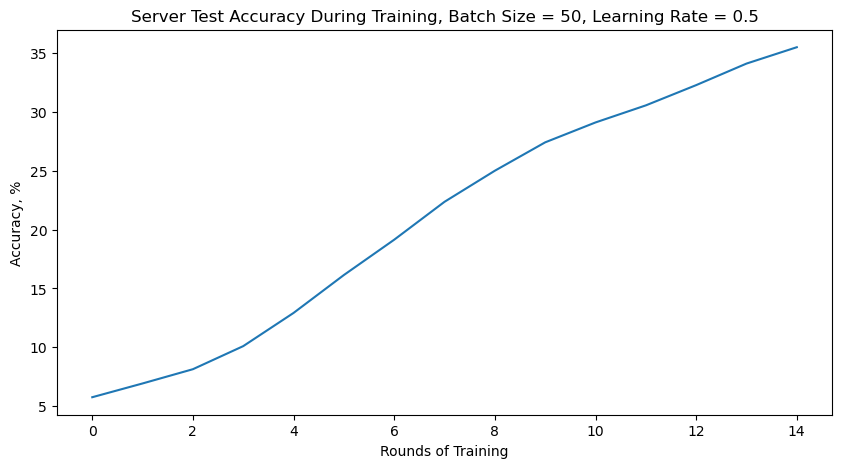

In [2]:
batches = [10, 50]
lrs = [0.1, 0.5]
for batch_size in batches:
    for lr in lrs:
        sc = Scaffold(batch_size=batch_size, lr=lr, model_params={
            'input_dim': 784,
            'hidden_dim': 200,
            'output_dim': 10
        }, device="cpu")
        sc.prepare()

        sc.train(verbose=False)

        sc_logs = [client.logs for client in sc.server.clients]

        plt.figure(figsize=(20, 10))
        plt.title(f"Loss During Training for {sc.clients_num} Clients, Batch Size = {batch_size}, Learning Rate = {lr}")
        plt.xlabel("Rounds Of Training")
        plt.ylabel("CrossEntropy Loss")
        for i in range(10):
            plt.plot(range(sc_logs[i]['rounds_num']), sc_logs[i]['losses'], label=f"Client {i}")

        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.xlabel("Rounds of Training")
        plt.ylabel("Accuracy, %")
        plt.title("Server Test Accuracy During Training, Batch Size = {}, Learning Rate = {}".format(batch_size, lr))
        plt.plot(sc.server.logs['val_accuracy'])

        plt.show()